<a href="https://colab.research.google.com/github/domi-baidoo/Stock_Predictor/blob/main/Apple_Stock_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf

In [ ]:
sp500 = yf.Ticker("AAPL")

In [ ]:
sp500 = sp500.history(period="max")

In [ ]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-03 00:00:00-05:00,243.360001,244.179993,241.889999,243.360001,40244100,0.0,0.0
2025-01-06 00:00:00-05:00,244.309998,247.330002,243.199997,245.000000,45045600,0.0,0.0
2025-01-07 00:00:00-05:00,242.979996,245.550003,241.350006,242.210007,40856000,0.0,0.0


In [ ]:
sp500.index

DatetimeIndex(['1980-12-12 00:00:00-05:00', '1980-12-15 00:00:00-05:00',
               '1980-12-16 00:00:00-05:00', '1980-12-17 00:00:00-05:00',
               '1980-12-18 00:00:00-05:00', '1980-12-19 00:00:00-05:00',
               '1980-12-22 00:00:00-05:00', '1980-12-23 00:00:00-05:00',
               '1980-12-24 00:00:00-05:00', '1980-12-26 00:00:00-05:00',
               ...
               '2024-12-26 00:00:00-05:00', '2024-12-27 00:00:00-05:00',
               '2024-12-30 00:00:00-05:00', '2024-12-31 00:00:00-05:00',
               '2025-01-02 00:00:00-05:00', '2025-01-03 00:00:00-05:00',
               '2025-01-06 00:00:00-05:00', '2025-01-07 00:00:00-05:00',
               '2025-01-08 00:00:00-05:00', '2025-01-10 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=11111, freq=None)

<Axes: xlabel='Date'>

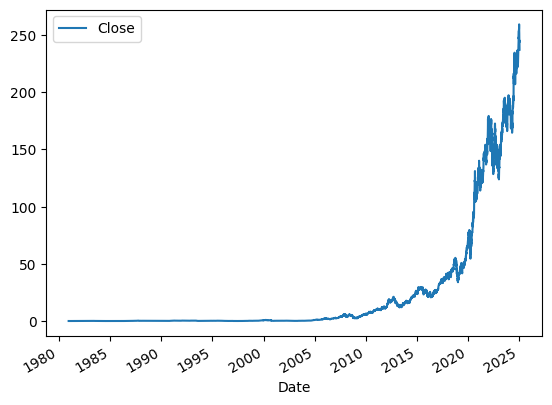

In [ ]:
sp500.plot.line(y="Close", use_index=True)

In [ ]:
del sp500["Dividends"]
del sp500["Stock Splits"]

Set up the target for Machine Learning

In [ ]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.093678
1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800,0.086802
1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000,0.088951
1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600,0.091530
1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600,0.097116
...,...,...,...,...,...,...
2025-01-03 00:00:00-05:00,243.360001,244.179993,241.889999,243.360001,40244100,245.000000
2025-01-06 00:00:00-05:00,244.309998,247.330002,243.199997,245.000000,45045600,242.210007
2025-01-07 00:00:00-05:00,242.979996,245.550003,241.350006,242.210007,40856000,242.699997


In [ ]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.093678,0
1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800,0.086802,0
1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000,0.088951,1
1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600,0.091530,1
1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600,0.097116,1
...,...,...,...,...,...,...,...
2025-01-03 00:00:00-05:00,243.360001,244.179993,241.889999,243.360001,40244100,245.000000,1
2025-01-06 00:00:00-05:00,244.309998,247.330002,243.199997,245.000000,45045600,242.210007,0
2025-01-07 00:00:00-05:00,242.979996,245.550003,241.350006,242.210007,40856000,242.699997,1


In [ ]:
sp500 = sp500.loc["1990-01-01":].copy()

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,0.248055,0.263889,0.246296,0.262129,183198400,0.263889,1
1990-01-03 00:00:00-05:00,0.267408,0.267408,0.263889,0.263889,207995200,0.264769,1
1990-01-04 00:00:00-05:00,0.269167,0.272685,0.262129,0.264769,221513600,0.265649,1
1990-01-05 00:00:00-05:00,0.265649,0.269167,0.260370,0.265649,123312000,0.267408,1
1990-01-08 00:00:00-05:00,0.263889,0.267408,0.260370,0.267408,101572800,0.264769,0
...,...,...,...,...,...,...,...
2025-01-03 00:00:00-05:00,243.360001,244.179993,241.889999,243.360001,40244100,245.000000,1
2025-01-06 00:00:00-05:00,244.309998,247.330002,243.199997,245.000000,45045600,242.210007,0
2025-01-07 00:00:00-05:00,242.979996,245.550003,241.350006,242.210007,40856000,242.699997,1


Train an initial model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

Measure if our model is doing what its supposed to do

In [ ]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [ ]:
import pandas as pd

preds = pd.Series(preds, index=test.index)

In [ ]:
precision_score(test["Target"], preds)

0.56

In [ ]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

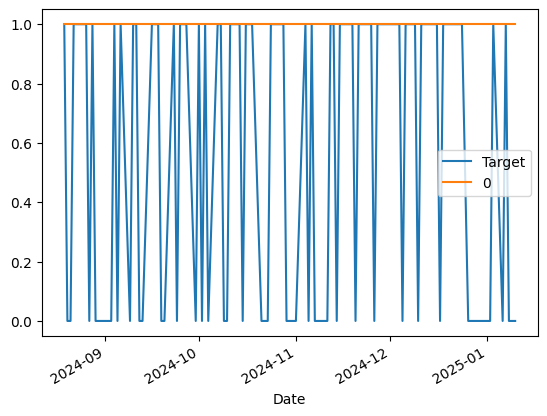

In [ ]:
combined.plot()

Build a backtesting system because the prediction is a bit far off

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions =  predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [ ]:
predictions = backtest(sp500, model, predictors)

In [ ]:
predictions["Predictions"].value_counts()

,count
Predictions,
0,4411
1,1912


In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5151673640167364

In [ ]:
predictions["Target"]. value_counts() / predictions.shape[0]

,count
Target,
1,0.523169
0,0.476831


Add additional predictors to the model

In [ ]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [ ]:
sp500 = sp500.dropna()

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,0.214789,0.218461,0.212954,0.213871,293664000,0.218461,1,0.993604,1.0,0.978993,1.0,1.007241,22.0,0.694753,111.0,0.637248,462.0
1993-12-15 00:00:00-05:00,0.212954,0.218461,0.212954,0.218461,123883200,0.215707,0,1.010615,1.0,1.014492,2.0,1.025698,23.0,0.711547,111.0,0.651009,462.0
1993-12-16 00:00:00-05:00,0.216625,0.218461,0.212954,0.215707,126369600,0.216625,1,0.993658,1.0,1.005994,2.0,1.010468,22.0,0.704569,110.0,0.642898,461.0
1993-12-17 00:00:00-05:00,0.216625,0.218461,0.213871,0.216625,145152000,0.209281,0,1.002123,1.0,1.001698,3.0,1.011960,23.0,0.709636,110.0,0.645728,461.0
1993-12-20 00:00:00-05:00,0.214789,0.218461,0.207446,0.209281,189033600,0.201939,0,0.982758,1.0,0.974358,2.0,0.975653,22.0,0.687599,110.0,0.623946,460.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-02 00:00:00-05:00,248.929993,249.100006,241.820007,243.850006,55740700,243.360001,0,0.986708,0.0,0.966830,1.0,1.030775,36.0,1.176864,142.0,1.454792,531.0
2025-01-03 00:00:00-05:00,243.360001,244.179993,241.889999,243.360001,40244100,245.000000,1,0.998994,0.0,0.977020,0.0,1.027413,35.0,1.173071,142.0,1.450852,531.0
2025-01-06 00:00:00-05:00,244.309998,247.330002,243.199997,245.000000,45045600,242.210007,0,1.003358,1.0,0.992039,1.0,1.033194,35.0,1.179604,142.0,1.459611,531.0


Improving the model

In [ ]:
model = RandomForestClassifier(n_estimators = 200, min_samples_split = 50, random_state=1)

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:
predictions = backtest(sp500, model, new_predictors)

In [ ]:
predictions["Predictions"].value_counts()

,count
Predictions,
0.0,4753
1.0,569


In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5166959578207382